# State 477 Final presentation

* Shasha Wang
* October 15 2020


## Objectives
* Define the research subject (i.e., y-variable)
* Data Mining through Decision Tree Cost Complexity Pruning
* Use regression models to quantify the predictive power of the varibles found in the step above
* Interpret the result and conclude

In [3]:
# Read in all the libraries and data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=6)
import os

os.chdir('/Users/wss/Dropbox/fall20/STAT477/Assignments/Final_project/') 
county_data = pd.read_csv("project_477.csv", index_col='Row.Label')
# print(county_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2715 entries, AL_Autauga County to WY_Weston County
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Five-digit.FIPS.Code              2715 non-null   int64  
 1   State.FIPS.Code                   2715 non-null   int64  
 2   County.FIPS.Code                  2715 non-null   int64  
 3   State.Abbreviation                2715 non-null   object 
 4   CountyName                        2715 non-null   object 
 5   Poor.Health                       2715 non-null   float64
 6   Election.Results.2016             2715 non-null   object 
 7   Uninsured                         2715 non-null   float64
 8   Primary.Care.Physicians.Per.1000  2715 non-null   float64
 9   Mental.health.providers.Per.1000  2715 non-null   float64
 10  Adult.Obesity                     2715 non-null   float64
 11  Proportion.of.Smokers             2715 non-nul

## Define the research subject
### Step 1 - Choose the y-variable: Poor.Health
### Step 2 - Browse the dataset
### Step 3 - Ask the question

## Define the research subject
### Step 1 - Choose the y-variable: Poor.Health

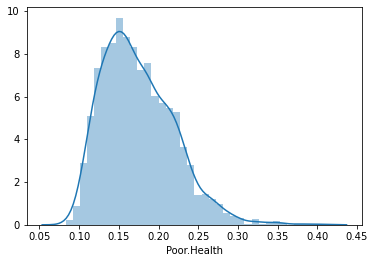

In [2]:
# See the distribution of y-variable
sns.distplot(county_data['Poor.Health']);
plt.show()

## Define the research subject
### Step 1 - Choose the y-variable: Poor.Health

In [3]:
# See the summary statistics of y-variable
print(county_data['Poor.Health'].describe())

count    2715.000000
mean        0.174385
std         0.045176
min         0.082900
25%         0.140350
50%         0.167300
75%         0.203950
max         0.407300
Name: Poor.Health, dtype: float64


## Define the research subject
### Step 1 - Choose the y-variable: Poor.Health

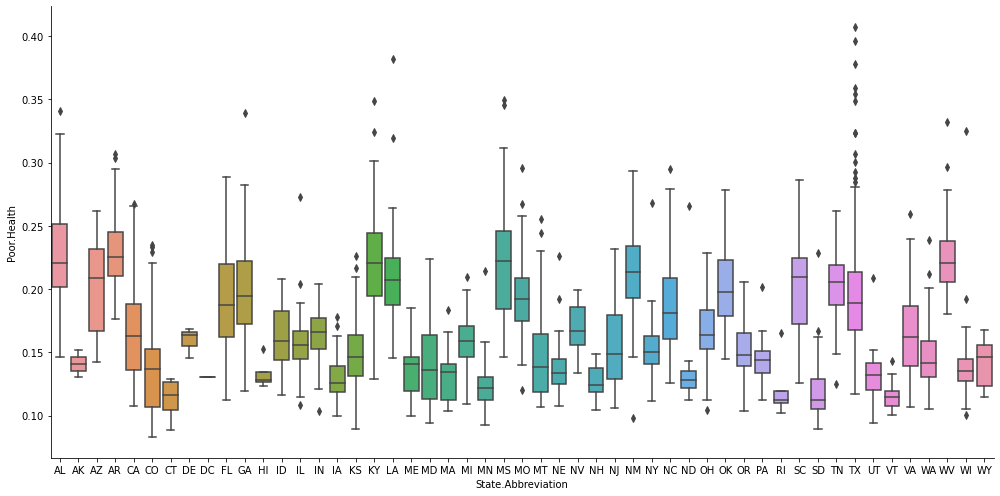

In [4]:
# See the ummary statistics of y-variable by states
# print(county_data.groupby('State.Abbreviation')['Poor.Health'].describe())
sns.catplot(x="State.Abbreviation", y='Poor.Health', kind="box", orient = "v", height = 7, aspect = 2, data=county_data); # The comparison boxplots
plt.show()

## Define the research subject
### Step 2 - Browse the dataset
#### See all the columns' names

In [273]:
print(county_data.columns)

Index(['Five-digit.FIPS.Code', 'State.FIPS.Code', 'County.FIPS.Code',
       'State.Abbreviation', 'CountyName', 'Poor.Health',
       'Election.Results.2016', 'Uninsured',
       'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000',
       'Adult.Obesity', 'Proportion.of.Smokers', 'High.School.Graduation',
       'Insufficient.Sleep', 'Physical.Inactivity', 'Excessive.Drinking',
       'Median.Household.Income', 'Severe.Housing.Problems', 'Unemployment',
       'Food.Insecurity.Quintile', 'Income.Inequality.Quartile',
       'Percent.Rural', 'Over.65', 'Percent.Females', 'Life.Expectancy',
       'Population'],
      dtype='object')


## Define the research subject
### Step 2 - Browse the dataset
#### Explore the association between y-variable and some features

1. positive correlation between obesity level and poor health

In [274]:
state_markers= [  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X', 
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X',
                  'o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

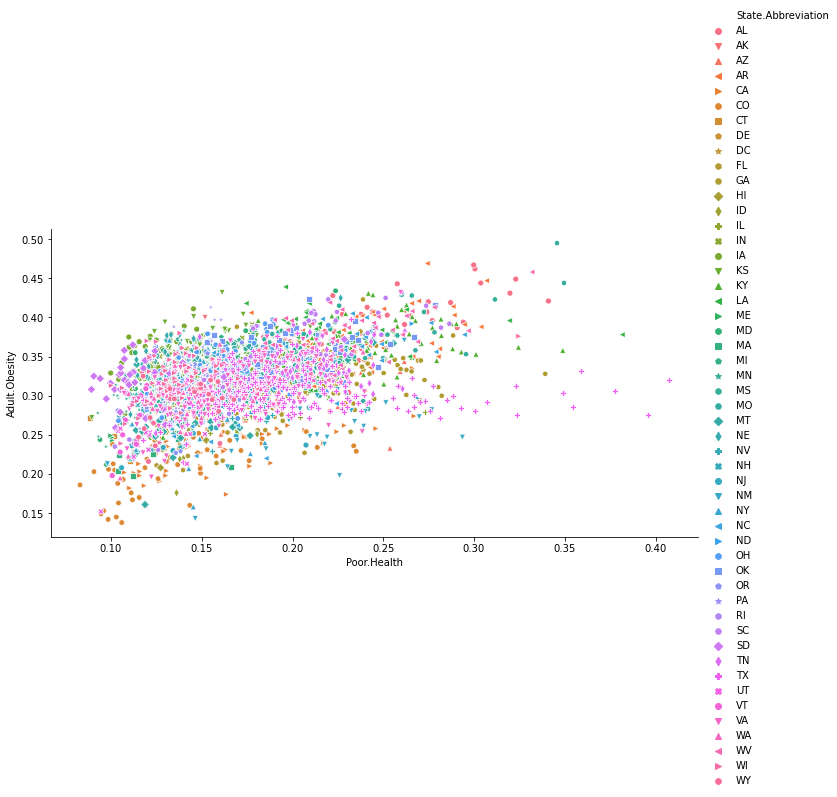

In [275]:
plot1 = sns.relplot('Poor.Health', 'Adult.Obesity', data = county_data, 
            hue="State.Abbreviation", style = "State.Abbreviation", height=5, aspect=2, markers = state_markers);
plt.show()

## Define the research subject
### Step 2 - Browse the dataset
#### Explore the association between y-variable and some features

1. positive correlation between obesity level and poor health
2. **negative correlation between life expectancy and poor health, i.e., the shorter lived, the healthier.**

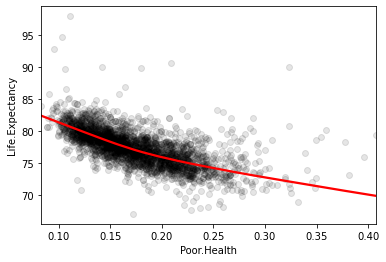

In [276]:
sns.regplot(county_data['Poor.Health'], county_data['Life.Expectancy'], lowess=True,
           scatter_kws={"color": "black", "alpha": 0.1}, line_kws={"color": "red"});
plt.show()

## Define the research subject
### Step 2 - Browse the dataset
#### Explore the association between y-variable and some features

1. positive correlation between obesity level and poor health
2. negative correlation between life expectancy and poor health, i.e., the shorter lived, the healthier
3. **the less smoking, the healthier; yet the more excessive drinking, the healthier**

This is a very bizzare relationship at first glance. Hence I will include the interaction terms between the two terms to correct for some underlying joint effect. Below I plot the joint distribution of the two variables.

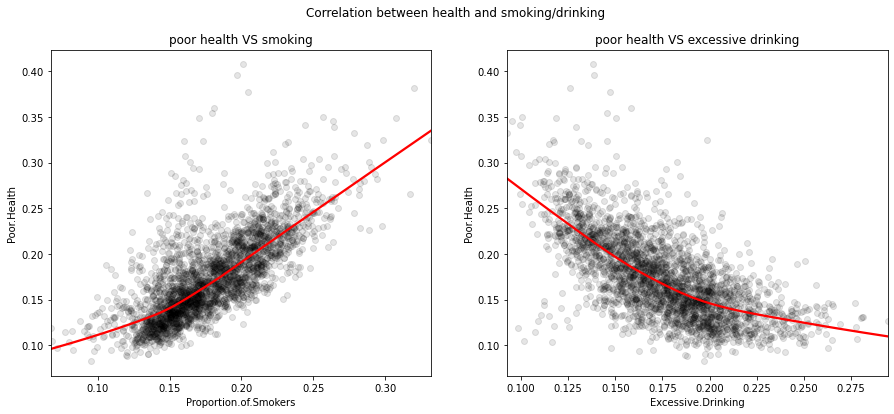

In [277]:
f, axes = plt.subplots(1, 2, figsize = (15, 6)) # Set the size of the plot.
f.suptitle('Correlation between health and smoking/drinking')
axes[0].set_title('poor health VS smoking')
axes[1].set_title('poor health VS excessive drinking')

sns.regplot(ax = axes[0], y = county_data['Poor.Health'], x = county_data['Proportion.of.Smokers'], lowess=True,
           scatter_kws={"color": "black", "alpha": 0.1}, line_kws={"color": "red"});

sns.regplot(ax = axes[1], y = county_data['Poor.Health'], x = county_data['Excessive.Drinking'], lowess=True,
           scatter_kws={"color": "black", "alpha": 0.1}, line_kws={"color": "red"});

## Define the research subject
### Step 2 - Browse the dataset
#### Explore the association between y-variable and some features

1. positive correlation between obesity level and poor health
2. negative correlation between life expectancy and poor health, i.e., the shorter lived, the healthier
3. **the less smoking, the healthier; yet the more excessive drinking, the healthier**

This is a very bizzare relationship at first glance. Hence I will include the interaction terms between the two terms to correct for some underlying joint effect. Below I plot the joint distribution of the two variables.

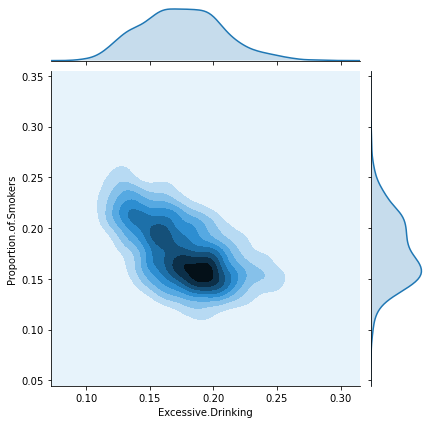

In [278]:
sns.jointplot(y = 'Proportion.of.Smokers', x = 'Excessive.Drinking', data=county_data, kind="kde");

## Define the research subject
### Step 2 - Browse the dataset
* Explore the association between some features

Note that the relationship between smoking and drinking also varies by **states**. Some have positive while some have negative correlations.

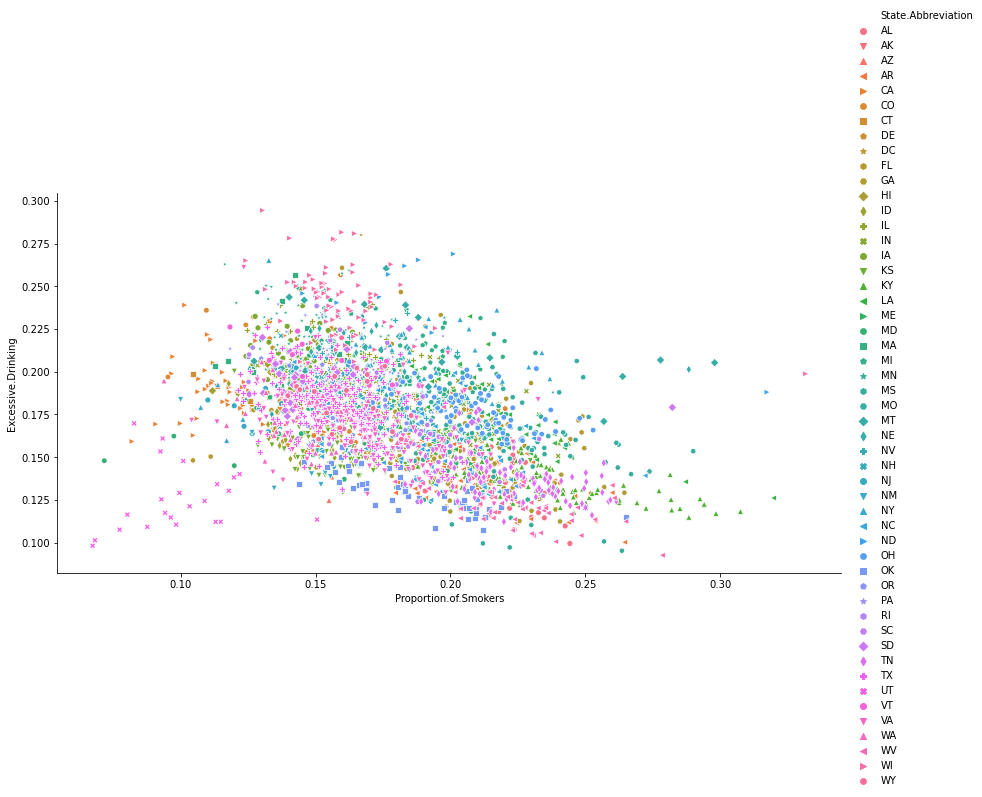

In [279]:
plot1 = sns.relplot('Proportion.of.Smokers', 'Excessive.Drinking', data = county_data, 
            hue="State.Abbreviation", style = "State.Abbreviation", height=6, aspect=2, markers = state_markers); 


## Define the research subject
### Step 3 - Question: Which variables have the most precitive power of the health index? 

Adult Obesity? Proportion of smokers? Median household income? ...

1. Does **obesity** predict macro health level? More specifically, how would health level change in response to obesity level?
2. Does **life expectancy** predict macro health level? If so, in which direction? Conventional wisdom says that life expectancy is oftentimes negatively correlated with health level, i.e., the less healthy, the longer lived. The mechanism is probably through a higher level of carefulness with and attentiveness to one's well-being if one is less healthy.
3. Does proportion of **female** residents predict macro health level? More specifically, is it true that women tend to live longer than men?



## Data Mining through Decision Tree Cost Complexity Pruning
### Step 1 - Prepare the data for decision tree analysis

* Create binarized entries for all the categorical variables 
* Create the train/test split

In [5]:
from sklearn.model_selection import train_test_split

# a. Create a new version of the data frame that just has the continuous variables in it. Call it 'Xcts'. 
Xcts = county_data[['Uninsured',
  'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000',
  'Adult.Obesity',  'Proportion.of.Smokers', 'High.School.Graduation','Insufficient.Sleep',
  'Physical.Inactivity','Excessive.Drinking','Median.Household.Income','Severe.Housing.Problems','Unemployment',
  'Percent.Rural','Over.65','Percent.Females','Life.Expectancy','Population']]

# b. Create a new version of the data frame that just has the categorical predictor variables in it. Call it "Xcat".
Xcat = county_data[['State.Abbreviation', 'Election.Results.2016','Food.Insecurity.Quintile','Income.Inequality.Quartile']]

# c. Binarize the categorical variables using the pandas get_dummies function and use its 'drop_first=True' argument.
Xcat = pd.get_dummies(Xcat, drop_first=True) # Categorical variables.

# d. Build a final prediction data frame by merging the continuous and binarized categorical variables on their index. Call the combined data simply "X". 
X = pd.merge(Xcts, Xcat, left_index=True, right_index=True)

# e. Extract the y-variable from the data, and save it into a variable called y.
y = county_data[['Poor.Health']]

# Create the train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=1940) # A 50/50 split.


## Data Mining through Decision Tree Cost Complexity Pruning

### Step 2 - Build a tree using cost complexity pruning


1. Get alphas from the cost complexity pruning path of a decision tree regressor

2. For each value of $\alpha$, find the tree that minimizes cost, $T_\alpha$

3. Then for each $T_\alpha$, find its test set prediction error

4. Choose the $\alpha$ that has lowest test set prediction error

## Data Mining through Decision Tree Cost Complexity Pruning
### Step 2 - Build a tree using cost complexity pruning

1. **Get alphas from the cost complesity pruning path of a decision tree regressor**
2. For each value of $\alpha$, find the tree that minimizes cost, $T_\alpha$
3. Then for each $T_\alpha$, find its test set prediction error
4. Choose the $\alpha$ that has lowest test set prediction error

In [281]:
from sklearn import tree
import sklearn
print(sklearn.__version__)

# a. Set up a decision tree regressor and create its cost complexity pruning path. Save the alphas and impurities into variables.
dtr = tree.DecisionTreeRegressor(random_state=0) # Set up the tree.
path = dtr.cost_complexity_pruning_path(X_train, y_train) # Create the pruning path.
ccp_alphas, impurities = path.ccp_alphas, path.impurities # The tree impurities along the pruning path. Note the tuple assignment.


0.23.1


## Data Mining through Decision Tree Cost Complexity Pruning
### Step 2 - Build a tree using cost complexity pruning

1. Get alphas from the cost complesity pruning path of a decision tree regressor
2. **For each value of $\alpha$, find the tree that minimizes cost, $T_\alpha$**
3. Then for each $T_\alpha$, find its test set prediction error
4. Choose the $\alpha$ that has lowest test set prediction error

In [282]:
# b. Write a for loop that iterates over the alphas, creating a new tree for each value of alpha, 
# that is then saved (append) into a list that is called rgrs.

rgrs = [] # A container for the trees along the pruning path.
for ccp_alpha in ccp_alphas: # A for loop, fitting a tree for each value of alpha
    dtr = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    dtr.fit(X_train, y_train)
    rgrs.append(dtr)



## Data Mining through Decision Tree Cost Complexity Pruning
### Step 2 - Build a tree using cost complexity pruning

1. Get alphas from the cost complesity pruning path of a decision tree regressor
2. For each value of $\alpha$, find the tree that minimizes cost, $T_\alpha$
3. **Then for each $T_\alpha$, find its test set prediction error**
4. Choose the $\alpha$ that has lowest test set prediction error

In [283]:
# c. Use the 'score' method to obtain the "scores" for both the training and test data sets. 
# Save the scores into variables called 'train_scores' and 'test_scores'.

train_scores = [dtr.score(X_train, y_train) for dtr in rgrs] # The score function returns the R-squared here.
test_scores = [dtr.score(X_test, y_test) for dtr in rgrs] # The score function returns the R-squared here.


## Data Mining through Decision Tree Cost Complexity Pruning
### Step 2 - Build a tree using cost complexity pruning

1. Get alphas from the cost complesity pruning path of a decision tree regressor
2. For each value of $\alpha$, find the tree that minimizes cost, $T_\alpha$
3. Then for each $T_\alpha$, find its test set prediction error
4. **Choose the $\alpha$ that has lowest test set prediction error**

In [284]:
# d. Find the index at which the maximum of the *test* scores appears (use the .idxmax() method).
best = pd.Series(test_scores).idxmax() # Find the index of the best tree.

# e. Print out the test score (which is just the R-squared) for the best tree.
print('The test score (which is just the R-squared) for the best tree is ' , test_scores[best])
print("The best tree's value of alpha is ",ccp_alphas[best])

The test score (which is just the R-squared) for the best tree is  0.7532503404878569
The best tree's value of alpha is  4.282870639493723e-06


## Data Mining through Decision Tree Cost Complexity Pruning
### Step 2 - Build a tree using cost complexity pruning

* Reviewing the best tree


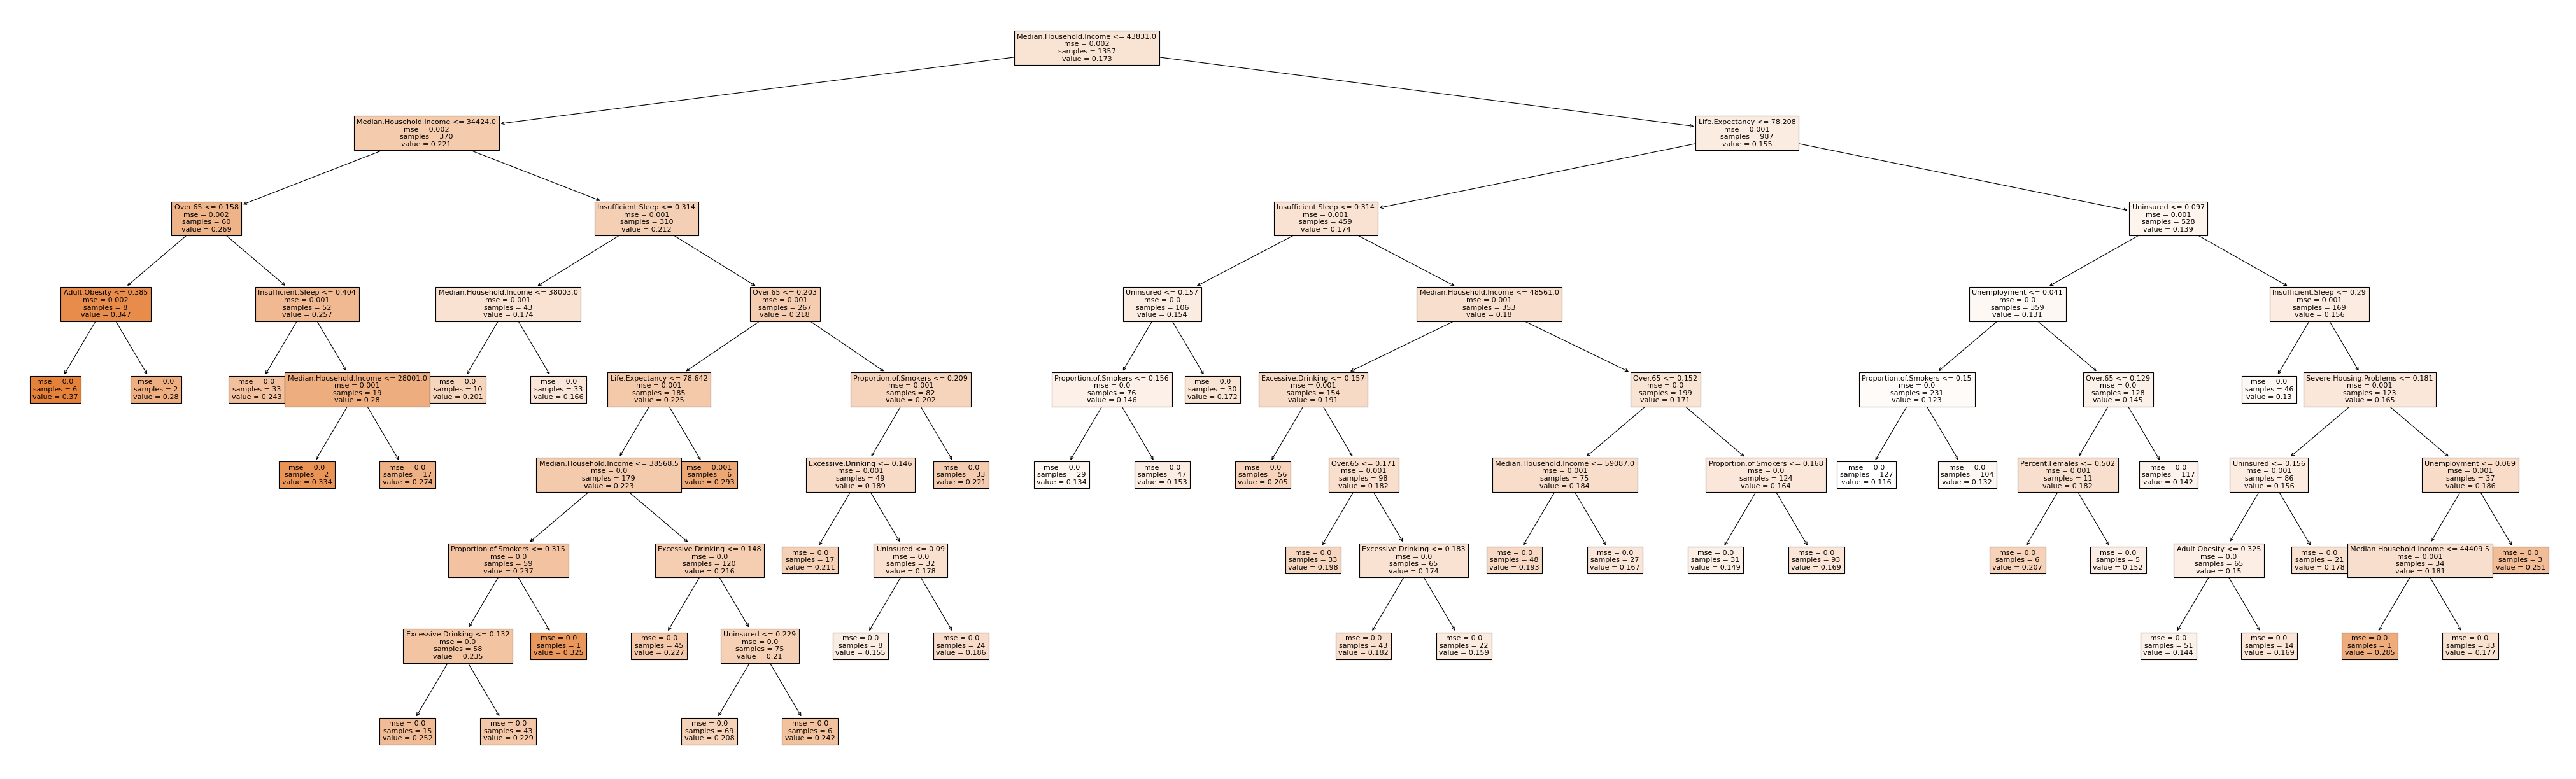

In [285]:
# Plot the best tree
best_tree = rgrs[best] # Pull out the best tree from the pruning path. 

fig, ax = plt.subplots(num=None, figsize=(65, 20), dpi=80, facecolor='w', edgecolor='k')
tree.plot_tree(best_tree, filled=True, feature_names=X.columns, fontsize=10);
plt.show()


## Data Mining through Decision Tree Cost Complexity Pruning
### Step 3 - See the most relevant variables

In [286]:
importances = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(best_tree.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
print(importances[:12]) # Top 12 variables.

                    Feature  Importance
9   Median.Household.Income    0.597000
15          Life.Expectancy    0.135000
6        Insufficient.Sleep    0.078000
13                  Over.65    0.056000
0                 Uninsured    0.045000
4     Proportion.of.Smokers    0.024000
11             Unemployment    0.022000
8        Excessive.Drinking    0.021000
10  Severe.Housing.Problems    0.010000
3             Adult.Obesity    0.008000
14          Percent.Females    0.003000
46    State.Abbreviation_NH    0.000000


## Use Regression Models to Quantify the Predictive Power of the Variables
### Step 1 - Check for Colinearity

#### Method 1 - Crude Way to Check for Colinearity

Since we have more than 10 features and eyeballing alone would not yield an accurate judgment of the existence of colinearity, we need to employ more quantifiable measures.

In [287]:
x_array= np.array([county_data["Median.Household.Income"],county_data["Life.Expectancy"], \
             county_data["Insufficient.Sleep"],county_data["Over.65"],county_data["Uninsured"], \
             county_data["Proportion.of.Smokers"],county_data["Unemployment"],county_data["Excessive.Drinking"], \
             county_data["Severe.Housing.Problems"],county_data["Adult.Obesity"],county_data["Percent.Females"]])
print(np.corrcoef(x_array))

[[ 1.        0.645319 -0.32039  -0.303021 -0.363491 -0.63247  -0.436194
   0.518233 -0.020026 -0.473422  0.050635]
 [ 0.645319  1.       -0.540194 -0.026228 -0.23065  -0.706449 -0.410923
   0.56315   0.03752  -0.571843 -0.097563]
 [-0.32039  -0.540194  1.       -0.214732  0.066472  0.659605  0.470463
  -0.454499  0.255053  0.446421  0.090203]
 [-0.303021 -0.026228 -0.214732  1.       -0.016568 -0.051275  0.103103
  -0.176169 -0.240449 -0.016029  0.080323]
 [-0.363491 -0.23065   0.066472 -0.016568  1.        0.13128   0.078718
  -0.356325  0.173893  0.033236 -0.076231]
 [-0.63247  -0.706449  0.659605 -0.051275  0.13128   1.        0.410051
  -0.484103  0.0162    0.58958  -0.00331 ]
 [-0.436194 -0.410923  0.470463  0.103103  0.078718  0.410051  1.
  -0.35543   0.241949  0.255381  0.022032]
 [ 0.518233  0.56315  -0.454499 -0.176169 -0.356325 -0.484103 -0.35543
   1.       -0.066352 -0.39075  -0.171623]
 [-0.020026  0.03752   0.255053 -0.240449  0.173893  0.0162    0.241949
  -0.066352  1.

## Use Regression Models to Quantify the Predictive Power of the Variables
### Step 1 - Check for Colinearity

#### Method 2 - Implement VIF to Check for Colinearity

1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable

If the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

## Use regression models to quantify
### Step 1 - Check for Colinearity - Method 2 - VIF

1. **Run a multiple regression**

In [288]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = county_data[["Poor.Health","Median.Household.Income","Life.Expectancy","Insufficient.Sleep","Over.65","Uninsured","Proportion.of.Smokers","Unemployment","Excessive.Drinking","Severe.Housing.Problems","Adult.Obesity","Percent.Females"]]
df.dropna()
df = df._get_numeric_data() #drop non-numeric cols

# get y and X dataframes based on this regression:
yy, XX = dmatrices('Q("Poor.Health") ~ Q("Median.Household.Income") + Q("Life.Expectancy") + Q("Insufficient.Sleep") + Q("Over.65") + Q("Uninsured") + Q("Proportion.of.Smokers") + Q("Unemployment") + Q("Excessive.Drinking") + Q("Severe.Housing.Problems") + Q("Adult.Obesity") + Q("Percent.Females")', df, return_type='dataframe')


## Use regression models to quantify
### Step 1 - Check for Colinearity - Method 2 - VIF

1. Run a multiple regression
2. **Calculate the VIF factors**


In [289]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(XX.values, i) for i in range(XX.shape[1])]
vif["features"] = XX.columns


## Use regression models to quantify
### Step 1 - Check for Colinearity - Method 2 - VIF

1. Run a multiple regression
2. Calculate the VIF factors
3. **Inspect the factors for each predictor variable**

As can be seen from the table below, none of the features' VIF is between 5-10. Hence we needn't worry about co-linearity for the variables we choose as predictors.

In [290]:
print(vif.round(1))

    VIF Factor                      features
0  3653.300000                     Intercept
1     3.200000  Q("Median.Household.Income")
2     2.800000          Q("Life.Expectancy")
3     2.600000       Q("Insufficient.Sleep")
4     1.600000                  Q("Over.65")
5     1.400000                Q("Uninsured")
6     3.300000    Q("Proportion.of.Smokers")
7     1.600000             Q("Unemployment")
8     1.900000       Q("Excessive.Drinking")
9     1.600000  Q("Severe.Housing.Problems")
10    2.100000            Q("Adult.Obesity")
11    1.200000          Q("Percent.Females")


## Use regression models to quantify
### Step 2 - Run the multivariate regression

In [291]:
import statsmodels.formula.api as smf
import math
pd.set_option('display.float_format', lambda x: '%.6f' % x)

olsmod1 = smf.ols(formula='Q("Poor.Health") ~ Q("Median.Household.Income") + Q("Life.Expectancy") + \
                Q("Insufficient.Sleep") + Q("Over.65") + Q("Uninsured") + Q("Proportion.of.Smokers") + \
                Q("Unemployment") + Q("Excessive.Drinking") + Q("Severe.Housing.Problems") + Q("Adult.Obesity") \
                + Q("Percent.Females")', data=county_data) # Define the model.
olsres1 = olsmod1.fit() # Fit the model.
print(olsres1.summary()) # View the results.


                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1221.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:00:29   Log-Likelihood:                 6981.8
No. Observations:                2715   AIC:                        -1.394e+04
Df Residuals:                    2703   BIC:                        -1.387e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [292]:
olsmod2 = smf.ols(formula='Q("Poor.Health") ~ Q("Median.Household.Income") + Q("Life.Expectancy") + \
                          Q("Insufficient.Sleep") + Q("Over.65") + Q("Uninsured") + Q("Proportion.of.Smokers") + \
                          Q("Unemployment") + Q("Excessive.Drinking") + Q("Severe.Housing.Problems") + \
                          Q("Adult.Obesity") + Q("Percent.Females") \
                          + Q("Excessive.Drinking"):Q("Proportion.of.Smokers")', \
                          data=county_data) # Define the model.
olsres2 = olsmod2.fit() # Fit the model.
print(olsres2.summary()) # View the results.

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1288.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:00:29   Log-Likelihood:                 7142.9
No. Observations:                2715   AIC:                        -1.426e+04
Df Residuals:                    2702   BIC:                        -1.418e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [293]:
olsmod3 = smf.ols(formula='Q("Poor.Health") ~ Q("Median.Household.Income") + Q("Life.Expectancy") + \
                          Q("Insufficient.Sleep") + Q("Over.65") + Q("Uninsured") + Q("Proportion.of.Smokers") + \
                          Q("Unemployment") + Q("Excessive.Drinking") + Q("Severe.Housing.Problems") + \
                          Q("Adult.Obesity") + Q("Percent.Females") \
                          + Q("Excessive.Drinking"):Q("Proportion.of.Smokers") + \
                          Q("Adult.Obesity"):Q("Percent.Females")', \
                          data=county_data) # Define the model.
olsres3 = olsmod3.fit() # Fit the model.
print(olsres3.summary()) # View the results.

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1192.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:00:29   Log-Likelihood:                 7147.0
No. Observations:                2715   AIC:                        -1.427e+04
Df Residuals:                    2701   BIC:                        -1.418e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [294]:
olsmod4 = smf.ols(formula='Q("Poor.Health") ~ Q("Median.Household.Income") + Q("Life.Expectancy") + Q("Insufficient.Sleep") + Q("Over.65") + Q("Uninsured") + Q("Proportion.of.Smokers") + Q("Unemployment") + Q("Excessive.Drinking") + Q("Severe.Housing.Problems") + Q("Adult.Obesity") + Q("Percent.Females") + Q("Excessive.Drinking"):Q("Proportion.of.Smokers") + Q("Adult.Obesity"):Q("Percent.Females") + Q("Uninsured"):Q("Percent.Females")', data=county_data) # Define the model.
olsres4 = olsmod4.fit() # Fit the model.
print(olsres4.summary()) # View the results.

                            OLS Regression Results                            
Dep. Variable:       Q("Poor.Health")   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1115.
Date:                Tue, 20 Oct 2020   Prob (F-statistic):               0.00
Time:                        04:00:29   Log-Likelihood:                 7155.5
No. Observations:                2715   AIC:                        -1.428e+04
Df Residuals:                    2700   BIC:                        -1.419e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

## Comments on the Results
* **Significance** 

All the features including the interaction terms are statistically significant, though some of them are not economically significant, such as the county-wide median income variable "Median.Household.Income".

* **Interaction term**

Once the interaction term between smoking and drinking is included in the regression, the coefficients of both of the individual terms are positive, which is expected to be, since both smoking and excessive drinking lead to poor health.

* **Predictive power**

The adjusted R-square is quite high, i.e., 0.852. Hence we have a pretty predictive model for the (poor) health level.

* **Colinearity** 

Although we have checked for multi-colinearity beforehand, the result still displays it. This may be due to our including the interaction terms in the model.

## Conclusions - What predict poor health?

In (loose) order of predictive power in terms of both statistical and economic significance:

* **Life Expectancy** 

The longer lived, the less healthy, i.e., the less healthy, the longer lived. More specifically, life expectancy goes up by one year, and the proportion of county that has a poor health status goes up by 0.0004. This may be the most counterintuitive result in this exercise. But such can also be explained by some underlying correlations between age or health and other features, such as the frequency of visiting a doctor, the carefulness with one's physical well-being, etc.

* **Insufficient Sleep** 

Insufficient sleep is unsurprisingly negatively correlated with health. More specifically, the proportion of county that has insufficient sleep goes up by 1%, and the proportion of county that has a poor health status goes up by 0.17%, which is both statistically and economically significant. 

## Conclusions - What predict poor health? (cont.)

* **Smoking & Excessive Drinking** 

It is unsurprising that both smoking and excessive drinking are negatively related with health, and compared with drinking, the negative correlation between smoking and health are more salient judging by the coefficients. And the coefficient of their interaction term indicates that one's negative effect appears to be neutralized by the other's, which seems wierd, since people often expect one bad plus another bad is bigger than two bads.

* **Adult Obesity & Percentage of Females** 

The coefficient reveals a telling yet counterintuitive relationship between obesity and health. We often expect obesity is harmful to one's health, yet at least through the eyes of this model, the more obese a population is, the healthier it is. More specifically, population obesite rates increase by 1%, and the poor health rate decreases by 0.50%. 

Conventional wisdom tells us that women live longer than men, which is shown in this model. The percentage of women in a population rises by 1%, and then the poor health rate decrease by 0.26%. 

The coefficient of the interaction term of these two factors also show that population with both higher female percentage and higher obesity rate has better health level.  